**This notebook compute the active subspace of the Neural Network trained on MNIST dataset.**

In [1]:
# -*- coding: utf-8 -*-

# Copyright 2019 Weiqi Ji

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import nnsubspace.visual.subspaceplot as subspaceplot
from nnsubspace.nndataset.dataset import Dataset
from nnsubspace.nnmodel.model import NNModel
from nnsubspace.nnsubspace.subspace import NNSubspace

Using TensorFlow backend.


In [2]:
# The package supports mnist/cifar10/cifar100, you can also add other datasets to the package
dataset_name = 'mnist'

dataset = Dataset(dataset_name=dataset_name)
model = NNModel(dataset_name=dataset_name, model_id='0')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


**Test single sample**

sample 259 | model prediction | ground truth
label: 6, score: 0.69
label: 6, score: 1.00


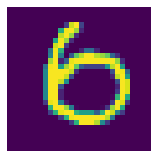

@sampling...



Time elapsed (hh:mm:ss.ms) 0:00:00.827444
@evaluate_gradient



Time elapsed (hh:mm:ss.ms) 0:00:02.924939
@evaluate_sample
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 70us/step
@svd


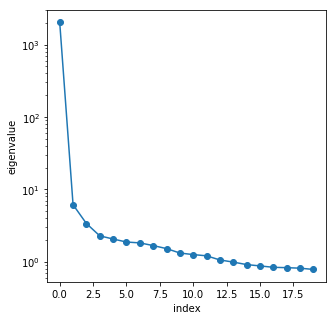

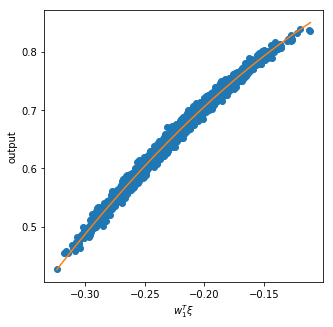

In [5]:
i_sample = 259
x = dataset.x_test[i_sample]
x = np.expand_dims(x, axis=0)
y = model.model.predict(x)
print('sample {} | model prediction | ground truth'.format(i_sample))
dataset.decode_predictions(y)
dataset.decode_predictions(dataset.y_test[i_sample])

subspaceplot.imshow(np.squeeze(x + dataset.x_train_mean), figsize=(2, 2))

AS = NNSubspace(model=model.model, x=x, x_train_mean=dataset.x_train_mean)

AS.sampling_setup(num_gradient_mc=500,
                 num_rs_mc=5000,
                 seed=7,
                 bool_clip=True,
                 sigma=10 / 255,
                 num_eigenvalue=20)
AS.run()

In [4]:
AS.x_train_mean.max()

0.0

for i_sample, x in enumerate(dataset.x_test[0:5000]):
    x = np.expand_dims(x, axis=0)
    y = model.model.predict(x)
    if y.max() < 0.7:
        print('sample {}'.format(i_sample))
        dataset.decode_predictions(y)
        dataset.decode_predictions(dataset.y_test[i_sample])

        subspaceplot.imshow(np.squeeze(x + dataset.x_train_mean),
                            figsize=(2, 2))

        AS = NNSubspace(model=model.model,
                        x=x,
                        x_train_mean=dataset.x_train_mean)

        AS.sampling_setup(num_gradient_mc=600,
                          num_rs_mc=600,
                          seed=7,
                          bool_clip=True,
                          sigma=2 / 255,
                          num_eigenvalue=20)
        AS.run()